# ECG Effects of Dofetilide, Moxifloxacin, Dofetilide+Mexiletine, Dofetilide+Lidocaine and Moxifloxacin+Diltiazem


## Sobre la base de datos

- 22 Sujeto sanos, hombres y mujeres entre 18 y 35 años

# Tratamientos realizados

- Solo dofetilida
- Mexiletina con o sin dofelitida
- Lidocaina con o sin dofetilida
- Moxifloxacina con y sin diltiazem
- Placebo

## Formas de administración

- Dofetilida y Mexiletina : Forma oral
- Lidocaina Moxifloxacina : Forma intravenosa


## Dosificación

- Dofetilida y Mexiletina : 3 veces al dia despues de las comidas
- Lidocaina y Moxifloxacina : Una dosis inicial de carga de 60 minutos, seguida de una dosis de mantenimiento de 30 minutos. 

## Objetivo

Identificar medicamentos de bajo riesgo que bloquean canales hERG pero también bloquean canales de calcio y/o sodio, permitiendo la aprobación de fármacos innovadores previamente considerados inseguros.



# 01 Obtain

In [1]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
# import loadmat from scipy.io

from scipy.io import loadmat

In [2]:
# load 12726m.info. this file is a plain text file

# load 0319214B-1559-4B14-8252-6659E91A480Dm.info only the first row


info = open('0319214B-1559-4B14-8252-6659E91A480Dm.info').read()

# print the content of the info file

print(info)

Source: record ecgdmmld/raw/2001/0319214B-1559-4B14-8252-6659E91A480D
val has 12 rows (signals) and 10000 columns (samples/signal)
Duration:     0:10
Sampling frequency: 1000 Hz  Sampling interval: 0.001 sec
Row	Signal	Gain	Base	Units
1	I	330979.8	-11915	mV
2	II	33780.4	-16215	mV
3	III	34026	-15142	mV
4	AVR	66871.4	17052	mV
5	AVL	67214.4	13611	mV
6	AVF	33937.9	-15696	mV
7	V1	59414.3	24746	mV
8	V2	26287.2	16784	mV
9	V3	34221.4	2823	mV
10	V4	20492.2	-20369	mV
11	V5	28580	-24822	mV
12	V6	44339.6	-24786	mV

To convert from raw units to the physical units shown
above, call the 'rdmat.m' function from the wfdb-matlab
toolbox: https://physionet.org/physiotools/matlab/wfdb-app-matlab/



## Observaciones

- La frecuencia de muestreo es 1000 Hz
- Se tiene 10 segundos de señal
- Se tiene 10000 muestras
- La ganancia es de 330979.8
- La base de tiempo es -11915

In [3]:
# load 12726m.mat 

data = loadmat('0319214B-1559-4B14-8252-6659E91A480Dm.mat')
data['val'] = data['val'][0, :]

## imprimir los campos de data

#print(data.keys())

ecg = data['val']

print(ecg)

[14563 12908 11254 ...  3972  7282  2979]


# 02 Data transformation

- Normalizar la señal ECG para que quede entre -1 y 1
- Transformar el objeto ECG a un arreglo 1D

In [4]:
base=-11915
ganancia=330979.8
ecg=(ecg-base)/ganancia # normalizar la señal ecg para que quede entre -1 y 1

print(ecg)

[0.07999884 0.07499853 0.07000125 ... 0.04799991 0.05800052 0.04499973]


In [5]:
# tranform the ecg signal to a 1D numpy array

ecg = ecg.flatten()

print(ecg)

[0.07999884 0.07499853 0.07000125 ... 0.04799991 0.05800052 0.04499973]


# 03 Data Exploration

In [6]:
# summary statistics for ecg

print('mean:', np.mean(ecg))
print('std:', np.std(ecg))
print('min:', np.min(ecg))
print('max:', np.max(ecg))

print('numero de muestras :',ecg.size)

mean: -0.014894185083198433
std: 0.03860183668863261
min: -0.098005981029658
max: 0.09799993836481864
numero de muestras : 10000


# 04 Visualization

In [7]:
# crear un vector de tiempo para la señal ecg
# vector de tiempo tiene la misma cantidad de muestras que la señal ecg
fs = 1000 # frecuencia de muestreo
t = np.arange(0, ecg.size/fs, 1/fs) # vector de tiempo
print(t)
print(t.size)

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]
10000


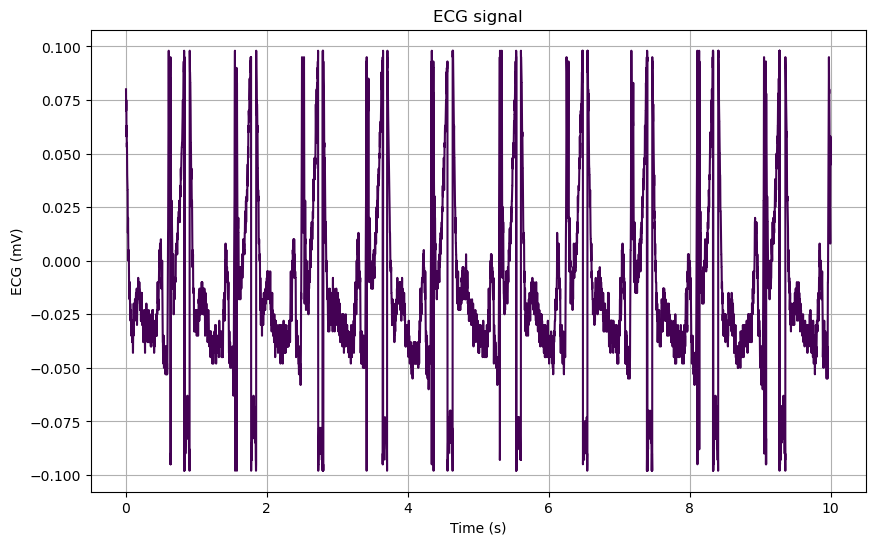

In [8]:
# plot the ecg signal

# change the color of the plot
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.viridis(np.linspace(0, 1, 10)))

# make a bigger plot 
plt.figure(figsize=(10, 6))


plt.plot(t, ecg)
plt.xlabel('Time (s)')
plt.ylabel('ECG (mV)')
plt.title('ECG signal')
plt.grid()
plt.show()